In [1]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
data = load_boston()

In [9]:
data

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [3]:
X, y = data['data'], data['target']

In [4]:
X_rm = X[:,5]

## loss1

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [5]:
def loss1(y, y_pred):
    loss = sum([(y_i - y_pred_i)**2 for y_i, y_pred_i in zip(y, y_pred)])
    loss = loss / len(y)
    return loss

In [6]:
def gradient_k(x, y, y_pred):
    gradient = sum([(y_i - y_pred_i) * x_i for y_i, y_pred_i, x_i in zip(y, y_pred, x)])
    gradient *= -2 / len(y)
    return gradient

In [7]:
def gradient_b(y, y_pred):
    gradient = sum([(y_i - y_pred_i) for y_i, y_pred_i in zip(y, y_pred)])
    gradient *= -2 / len(y)
    return gradient

In [10]:
def price(x,k,b):
    return k*x + b

In [11]:
iter_times = 5000

min_loss = float('inf')

current_k = random.random()*200 - 100
current_b = random.random()*200 - 100

lr = 0.01
for i in range(iter_times):
    y_pred = [price(x_i, current_k, current_b) for x_i in X_rm]
    current_loss = loss1(y, y_pred)
    
    if current_loss < min_loss:
        if i % 100 ==0:
            min_loss = current_loss
            print('Time is {}, current_k is {}, current_b is {}, loss is {}.'.format(i, current_k, current_b, min_loss))
    if i > 500: 
        lr = 0.001
    if i > 1500:
        lr = 0.0001
    if i > 3000:
        lr = 0.00001
    current_k = current_k - lr * gradient_k(X_rm, y, y_pred) 
    current_b = current_b - lr * gradient_b(y, y_pred) 

Time is 0, current_k is -34.98665671769707, current_b is -16.554468910993506, loss is 68064.50393587578.
Time is 100, current_k is 5.35084832100985, current_b is -10.808409032025008, loss is 50.6160547904387.
Time is 200, current_k is 5.439990348344461, current_b is -11.375451987522567, loss is 50.286594514201795.
Time is 300, current_k is 5.527014074191336, current_b is -11.929020177276561, loss is 49.9726062680274.
Time is 400, current_k is 5.611969836211927, current_b is -12.46943380509181, loss is 49.67336345835776.
Time is 500, current_k is 5.694906775882826, current_b is -12.997005465700088, loss is 49.388173613737834.
Time is 600, current_k is 5.703826057333856, current_b is -13.053742067571646, loss is 49.357911916044.
Time is 700, current_k is 5.711988265485939, current_b is -13.105662836846607, loss is 49.33028835563212.
Time is 800, current_k is 5.720130869136745, current_b is -13.157458899575436, loss is 49.30279733184643.
Time is 900, current_k is 5.72825391537359, current

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

## loss2

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

$$ loss = \frac{1}{n} \sum{|y_i - (kx_i + b_i)|} $$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum{sign*xi} ,\ sign = \begin{cases}-1& \text{yi>kxi+b}\\1& \text{yi<kxi+b}\end{cases}  $$

$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum{sign} ,\ sign = \begin{cases}-1& \text{yi>kxi+b}\\1& \text{yi<kxi+b}\end{cases}  $$

In [12]:
def loss2(y, y_pred):
    loss = sum([abs(y_i - y_pred_i) for y_i, y_pred_i in zip(y, y_pred)])
    loss = loss / len(y)
    return loss

In [13]:
def gradient_k2(x, y, y_pred):
    gradient = sum([(1 if y_i < y_pred_i else -1) * x_i for y_i, y_pred_i, x_i in zip(y, y_pred, x)])
    gradient *= 1 / len(y)
    return gradient

In [14]:
def gradient_b2(y, y_pred):
    gradient = sum([(1 if y_i < y_pred_i else -1) for y_i, y_pred_i in zip(y, y_pred)])
    gradient *= 1 / len(y)
    return gradient

In [15]:
iter_times = 5000

min_loss = float('inf')

current_k = random.random()*200 - 100
current_b = random.random()*200 - 100

lr = 0.01
for i in range(iter_times):
    y_pred = [price(x_i, current_k, current_b) for x_i in X_rm]
    current_loss = loss2(y, y_pred)
    
    if current_loss < min_loss:
        if i % 100 ==0:
            min_loss = current_loss
            print('Time is {}, current_k is {}, current_b is {}, loss is {}.'.format(i, current_k, current_b, min_loss))
    if i > 500: 
        lr = 0.001
    if i > 1500:
        lr = 0.0001
    if i > 3000:
        lr = 0.00001
    current_k = current_k - lr * gradient_k2(X_rm, y, y_pred) 
    current_b = current_b - lr * gradient_b2(y, y_pred) 

Time is 0, current_k is -23.009060101568508, current_b is -30.57850514226655, loss is 197.7148418013385.
Time is 100, current_k is -16.724425714216835, current_b is -29.578505142266394, loss is 157.2182124186545.
Time is 200, current_k is -10.439791326865004, current_b is -28.578505142266238, loss is 116.72158303596956.
Time is 300, current_k is -4.155156939513208, current_b is -27.57850514226608, loss is 76.22495365328493.
Time is 400, current_k is 2.129477447838583, current_b is -26.578505142265925, loss is 35.728324270600176.
Time is 500, current_k is 7.480598870763493, current_b is -25.728267988115668, loss is 4.772662313656913.
Time is 600, current_k is 7.609237880644909, current_b is -25.709647434755976, loss is 4.604884812510928.
Time is 700, current_k is 7.659863295664676, current_b is -25.703501189696734, loss is 4.57684770546969.
Time is 800, current_k is 7.680038619775332, current_b is -25.70234703949917, loss is 4.572658559168377.
Time is 900, current_k is 7.693186390526311

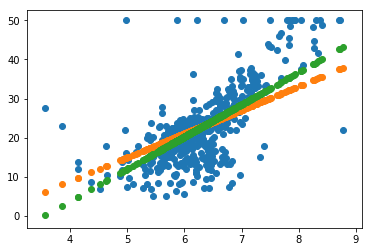

In [16]:
X_rm = X[:, 5]

k1 = 6.069410530558807
b1 = -15.379268044262211

k2 = 8.237639538081417
b2 = -29.135070799714647
price_by_random_k_and_b1 = [price(r, k1, b1) for r in X_rm]
price_by_random_k_and_b2 = [price(r, k2, b2) for r in X_rm]

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b1)
plt.scatter(X_rm, price_by_random_k_and_b2)

## Dynamic Programming

In [17]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [18]:
price = defaultdict(int)

In [19]:
for i,p in enumerate(original_price):
    price[i + 1] = p

In [20]:
def r(n):
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [21]:
from functools import wraps

In [22]:
called_time_with_arg = defaultdict(int)

def get_call_time(f):
    """@param f is a function"""
    @wraps(f)
    def wrap(n):
        """Haha I am warp"""
       # print('I can count')
        result = f(n)
        called_time_with_arg[(f.__name__, n)] += 1
        return result
    return wrap

In [23]:
def memo(f):
    already_computed = {}
    @wraps(f)
    def _wrap(n):
        if n in already_computed:
            result = already_computed[n]
        else:
            result = f(n)
            already_computed[n] = result
        return result
    return _wrap

In [24]:
@memo
@get_call_time
def r(n):
    return max([price[n]] + [r(i) + r(n-i) for i in range(1, n)])

In [25]:
r(45)

141

In [26]:
called_time_with_arg

defaultdict(int,
            {('r', 1): 1,
             ('r', 2): 1,
             ('r', 3): 1,
             ('r', 4): 1,
             ('r', 5): 1,
             ('r', 6): 1,
             ('r', 7): 1,
             ('r', 8): 1,
             ('r', 9): 1,
             ('r', 10): 1,
             ('r', 11): 1,
             ('r', 12): 1,
             ('r', 13): 1,
             ('r', 14): 1,
             ('r', 15): 1,
             ('r', 16): 1,
             ('r', 17): 1,
             ('r', 18): 1,
             ('r', 19): 1,
             ('r', 20): 1,
             ('r', 21): 1,
             ('r', 22): 1,
             ('r', 23): 1,
             ('r', 24): 1,
             ('r', 25): 1,
             ('r', 26): 1,
             ('r', 27): 1,
             ('r', 28): 1,
             ('r', 29): 1,
             ('r', 30): 1,
             ('r', 31): 1,
             ('r', 32): 1,
             ('r', 33): 1,
             ('r', 34): 1,
             ('r', 35): 1,
             ('r', 36): 1,
             ('r', 3

In [27]:
solution = {}

In [28]:
@memo
@get_call_time
def r(n):
    max_price, max_split = max([(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)])
    solution[n] = (n - max_split, max_split)
    return max_price

In [29]:
r(380)

1207

In [30]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (2, 3),
 6: (6, 0),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (10, 0),
 11: (11, 0),
 12: (1, 11),
 13: (2, 11),
 14: (3, 11),
 15: (2, 13),
 16: (2, 14),
 17: (6, 11),
 18: (1, 17),
 19: (2, 17),
 20: (3, 17),
 21: (10, 11),
 22: (11, 11),
 23: (1, 22),
 24: (2, 22),
 25: (3, 22),
 26: (2, 24),
 27: (2, 25),
 28: (6, 22),
 29: (1, 28),
 30: (2, 28),
 31: (3, 28),
 32: (10, 22),
 33: (11, 22),
 34: (1, 33),
 35: (2, 33),
 36: (3, 33),
 37: (2, 35),
 38: (2, 36),
 39: (6, 33),
 40: (1, 39),
 41: (2, 39),
 42: (3, 39),
 43: (10, 33),
 44: (11, 33),
 45: (1, 44),
 46: (2, 44),
 47: (3, 44),
 48: (2, 46),
 49: (2, 47),
 50: (6, 44),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (10, 44),
 55: (11, 44),
 56: (1, 55),
 57: (2, 55),
 58: (3, 55),
 59: (2, 57),
 60: (2, 58),
 61: (6, 55),
 62: (1, 61),
 63: (2, 61),
 64: (3, 61),
 65: (10, 55),
 66: (11, 55),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (2, 68),
 71: (2, 69),
 72: (6, 66),


In [31]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [32]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0:
        return [left_split]
    else:
        return parse_solution(right_split) + parse_solution(left_split)

In [34]:
parse_solution(367)

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 2,
 2]

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [35]:
solution_string = {}

In [36]:
from functools import lru_cache

In [37]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution_string[(string1, string2)] = operation 
    
    return min_distance

In [38]:
edit_distance('ABCDF', 'ACDEFGHJk')

6

In [39]:
solution_string

{('A', 'A'): '',
 ('A', 'AC'): 'ADD C',
 ('A', 'ACD'): 'ADD D',
 ('A', 'ACDE'): 'ADD E',
 ('A', 'ACDEF'): 'ADD F',
 ('A', 'ACDEFG'): 'ADD G',
 ('A', 'ACDEFGH'): 'ADD H',
 ('A', 'ACDEFGHJ'): 'ADD J',
 ('A', 'ACDEFGHJk'): 'ADD k',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AC'): 'SUB B => C',
 ('AB', 'ACD'): 'ADD D',
 ('AB', 'ACDE'): 'ADD E',
 ('AB', 'ACDEF'): 'ADD F',
 ('AB', 'ACDEFG'): 'ADD G',
 ('AB', 'ACDEFGH'): 'ADD H',
 ('AB', 'ACDEFGHJ'): 'ADD J',
 ('AB', 'ACDEFGHJk'): 'ADD k',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AC'): '',
 ('ABC', 'ACD'): 'ADD D',
 ('ABC', 'ACDE'): 'ADD E',
 ('ABC', 'ACDEF'): 'ADD F',
 ('ABC', 'ACDEFG'): 'ADD G',
 ('ABC', 'ACDEFGH'): 'ADD H',
 ('ABC', 'ACDEFGHJ'): 'ADD J',
 ('ABC', 'ACDEFGHJk'): 'ADD k',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AC'): 'DEL D',
 ('ABCD', 'ACD'): '',
 ('ABCD', 'ACDE'): 'ADD E',
 ('ABCD', 'ACDEF'): 'ADD F',
 ('ABCD', 'ACDEFG'): 'ADD G',
 ('ABCD', 'ACDEFGH'): 'ADD H',
 ('ABCD', 'ACDEFGHJ'): 'ADD J',
 ('ABCD', 'ACDEFGHJk'): 'ADD k',
 ('ABCDF', 'A'): 'DE

In [40]:
option = []
def parse_solution_string(string):
    left_string, right_string = string
    op = solution_string[string]
    if op or left_string != right_string:
        if op[:3] == 'DEL':
            new_string = left_string[:-1]
            option.append(op)
            string = (new_string, right_string)
            parse_solution_string(string)
        elif op[:3] == 'ADD':
            new_string = right_string[:-1]
            option.insert(0, op)
            string = (left_string, new_string)
            parse_solution_string(string)
        elif op[:3] == 'SUB':
            if option[0][:3] == 'DEL':
                option.append(op)
            else:
                option.insert(0, op)
            string = (left_string[:-1], right_string[:-1])
            parse_solution_string(string)
        else:
            string = (left_string[:-1], right_string[:-1])
            parse_solution_string(string)
    else:
        print(option)
        return option

In [41]:
option = []
parse_solution_string(('ABCDF', 'ACDEFG'))

['ADD E', 'ADD G', 'DEL B']


### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans：在程序运行时，会使用多次子结果，动态规划保存了这些子结果，以便应用时直接调用，无需再重复计算。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: 因为一些场景使用动态规划更好，用动态规划更方便；机器学习并不是在所有场景都适用。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans：0-1背包问题，编辑距离问题，最长公共子序列问题。

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: 拼写检查，论文查重，基因序列对比，拼写预测。

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 最优子结构，边界，状态转移公式。最优子结构指的是，问题的最优解包含子问题的最优解；边界是子问题无需再简化；状态转移公式是问题每个阶段和下个阶段的关系。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: 没有统一的标准模型；数值方法求解时存在维数灾。